# Pymaceuticals Inc.
---

### Analysis

As a senior data analyst at Pymaceuticals, Inc, I have received a data set from a study with 249 mice who were identified with SCC tumors and received treatment with a range of drug regimens. The objective of the study was to identify the performance of the laboratory drug (Capomulin) against other treatment regimens.
So, the first step was to identify if the data that I had was clean. For that reason, I decided to check the variable "Mouse ID", and I found that I had one duplicate ID.  After that, I completed an analysis, finding the bellow results:

*Summary Statistics where it can see the different drug regimens with their respective mean, median, variance, standard deviation, and standard error of the tumor volume. 
According to the above, it can say that the mean and median of Capomulin and Ramicane are the lowest for that reason they have the lowest and symmetric distribution of tumor volume with respect to the other drug regimens.
Additionally, it can say that the highest variance and standard deviation, and dispersion were from Ketapril, Naftisol, Placebo y Stelasyn. It could indicate the highest variability in the tumor volume in those drug regimenes.

*As well as it can see in the bar chart that Capomulin and Ramicane were the drugs that had more than 200 observed mouse timepoints, on the other hand, Propriva was the drug with less than 150 observed mouse timepoints.

*Moreover, the pie chart shows the mice's sex distribution in the study. It can see that 51% were male and 49% were female.

*Also, I generated a box plot that shows the distribution of the tumor volume for each treatment group. If i zoom to the Capomulin box i could say that the median is close to the first quarter and the superior outlier was more or less 48 and the lower outlier was more or less 23. 
If i Compared it with the others i could say that the best drug regimenes according with the final tumor volume distribution were Capomulin and Ramicane.

*With the line plot of tumor volume vs. time point for a single mouse treatment with Capomulin. It can see that with more days of treatment with Capomulin the tumor volume is going down.

*It was a strong correlation between mouse weight and average tumor volume, as was demonstrated in the linear regression model of Capomulin drug mice. The more weight of the mouse, the greater the risk of having a tumor in the mice.


In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
results_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_unique = len(results_data_complete["Mouse ID"].unique())
mice_unique

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = results_data_complete.loc[results_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = results_data_complete.loc[results_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = results_data_complete[results_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_unique_df_without_duplicates = len(clean_study_data_complete["Mouse ID"].unique())
mice_unique_df_without_duplicates

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var=clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std=clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem=clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
Summary_statistics_df=pd.DataFrame({'Mean Tumor Volume': mean,
                      'Median Tumor Volume': median,
                      'Tumor Volume Variance':var,
                      'Tumor Volume Std. Dev.':std,
                      'Tumor Volume Std. Err.':sem})
Summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = clean_study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

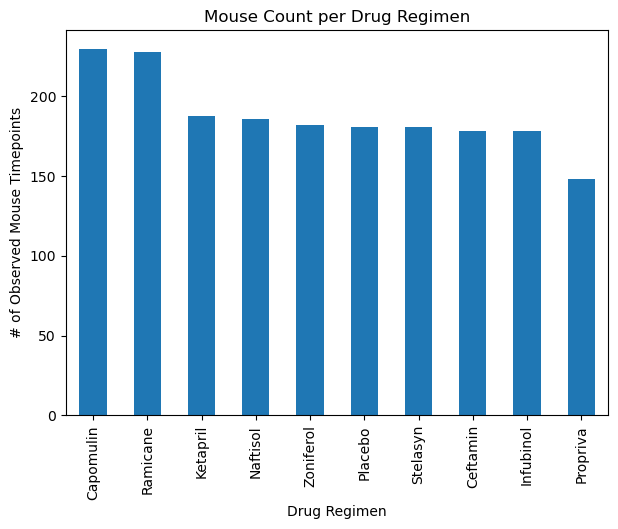

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_drug = clean_study_data_complete.groupby("Drug Regimen").count()["Mouse ID"]
sorted_mouse_drug = mouse_drug.sort_values(ascending=False)

sorted_mouse_drug.plot(kind="bar", figsize=(7, 5))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse Count per Drug Regimen")

plt.show()

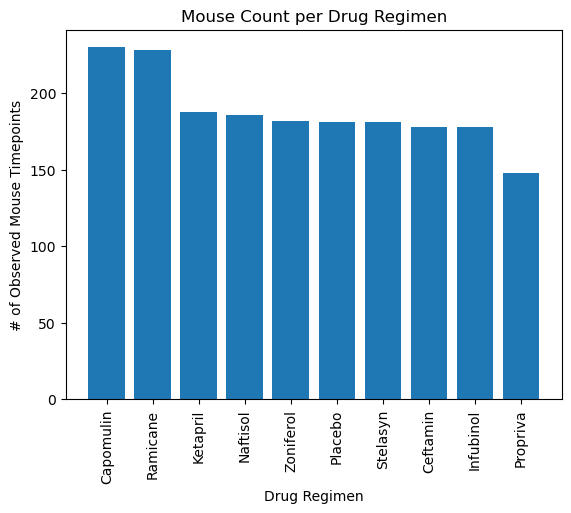

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mouse_drug = clean_study_data_complete.groupby("Drug Regimen").count()["Mouse ID"]
sorted_mouse_drug = mouse_drug.sort_values(ascending=False)

plt.bar(sorted_mouse_drug.index, sorted_mouse_drug)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse Count per Drug Regimen")

plt.xticks(rotation=90)  # Rotating x-axis labels for better readability

plt.show()

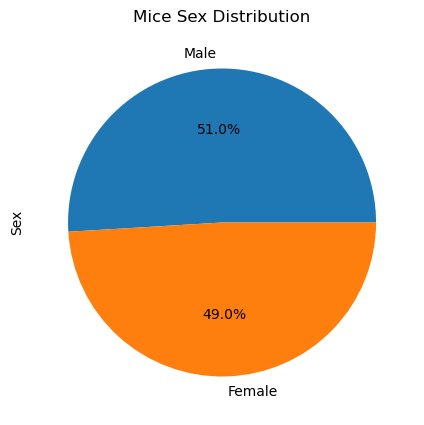

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_study_data_complete['Sex'].value_counts()

sex_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 5), title="Mice Sex Distribution")


plt.show()

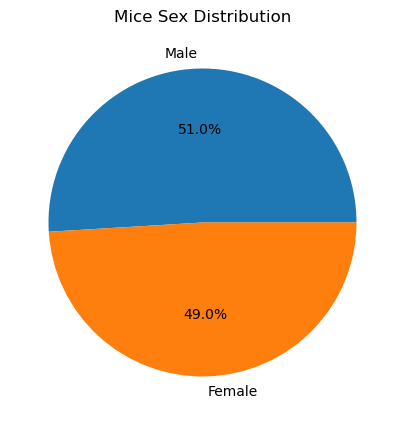

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = clean_study_data_complete['Sex'].value_counts()

plt.figure(figsize=(7,5))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%')

plt.title("Mice Sex Distribution")

plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mice_groupby = clean_study_data_complete.groupby('Mouse ID')
greatest = mice_groupby['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_df = pd.merge(greatest, clean_study_data_complete, on=['Mouse ID', 'Timepoint'])
greatest_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels)

treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for t in range(len(treatments_list)):
        
    # Locate the rows which contain mice on each drug and get the tumor volumes

    tumor_volumes = greatest_df.loc[greatest_df['Drug Regimen'] == treatments_list[t], 'Tumor Volume (mm3)']
    
    # add subset 
 
    tumor_list.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_list[t].quantile([.25, .5, .75])
    lowrq = quartiles[.25]
    upprq = quartiles[.75]
    iqr = upprq - lowrq
    lwr_bnd = lowrq - (1.5 * iqr)
    upr_bnd = upprq + (1.5 * iqr)

    out = tumor_list[t].loc[(tumor_list[t] < lwr_bnd) | (tumor_list[t] > upr_bnd)]
    print(f"{treatments_list[t]}'s potential outliers: {out}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


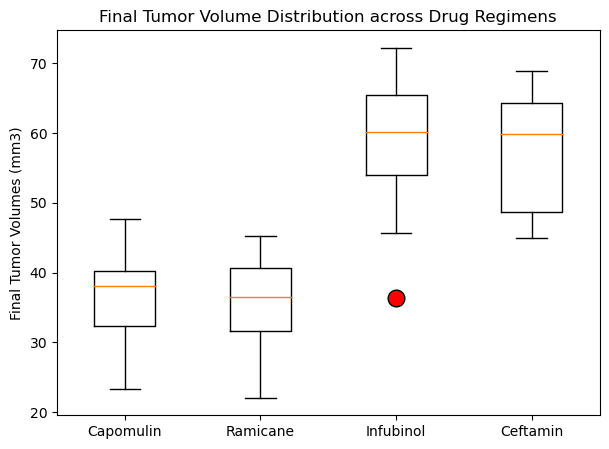

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(7, 5))
position = np.arange(len(tumor_list))
bp = plt.boxplot(tumor_list, positions=position, labels=treatments_list)

plt.setp(bp['fliers'], markerfacecolor='red', markersize=12)
plt.title("Final Tumor Volume Distribution across Drug Regimens")
plt.ylabel('Final Tumor Volumes (mm3)')
plt.show()

## Line and Scatter Plots

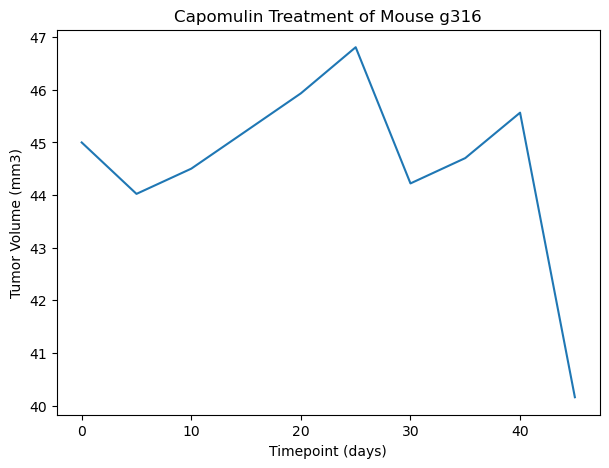

In [94]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter all mice treated with Capomulin
capomulin_filter=clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen']=='Capomulin']
unique_capomulin=capomulin_filter['Mouse ID'].unique()

# Select a random mouse from the above list
random_mouse = np.random.choice(unique_capomulin)
mouse_filter = clean_study_data_complete.loc[clean_study_data_complete['Mouse ID'] == random_mouse]

# Plot results for tumor volume vs time points
plt.figure(figsize=(7, 5))
plt.plot(mouse_filter['Timepoint'], mouse_filter['Tumor Volume (mm3)'])

# Add labels to graph
plt.title(mouse_filter.iloc[0, 4] + ' Treatment of Mouse ' + mouse_filter.iloc[0, 0])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


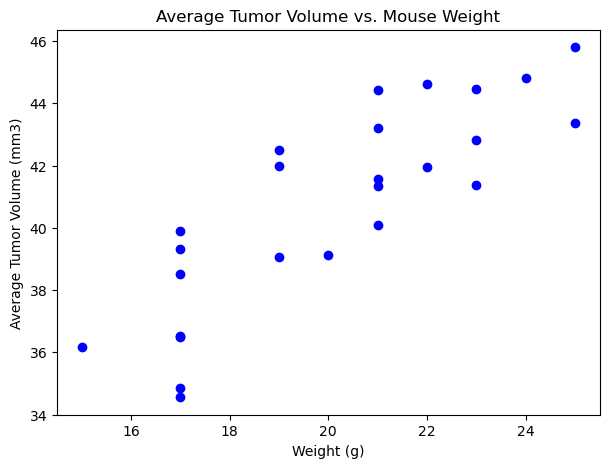

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

group_by_cap=capomulin_filter.groupby('Mouse ID')
average_capomulin=group_by_cap.mean(numeric_only=True)

#Graph scatterplot variables 'Weight (g)' and 'Tumor Volume (mm3)'
plt.figure(figsize=(7, 5))
plt.scatter(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'], facecolors="blue", edgecolors="blue")

#labels graph
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


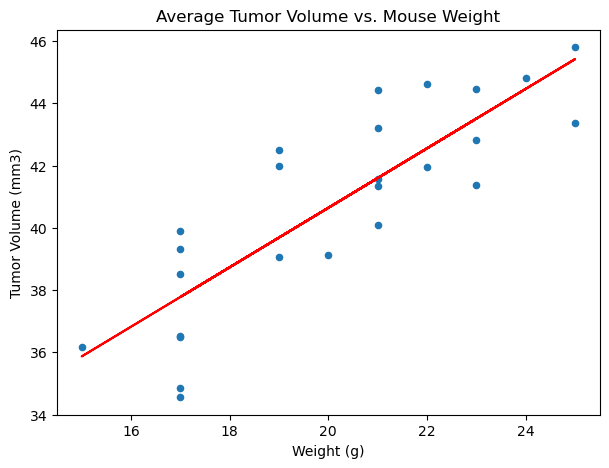

In [68]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
average_capomulin.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', figsize=(7, 5), title="Average Tumor Volume vs. Mouse Weight")

# Calculate linear regression info
slope, intercept, rvalue, pvalue, stderr = st.linregress(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'])
regression = average_capomulin['Weight (g)'] * slope + intercept

# Regression line
regression_line, = plt.plot(average_capomulin['Weight (g)'], regression, color='red')

# Calculate and display correlation info
correlation = st.pearsonr(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")